#1) Importando Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
plt.rcParams['text.usetex'] = False

In [3]:
minimo_infectados = pd.read_csv('Minimo de infectados final.csv', header = None)
column_names = ['Population', 'Basic Reprodution Number', 'Removal Rate', 'Immunity loss rate' ,'Vaccines Number (Normalized)', 'Vaccination begin time', 'Vaccination Rate' , 'Minimum number of infected']
minimo_infectados.columns = column_names
minimo_infectados['Population (log)'] = np.log10(minimo_infectados['Population'])
minimo_infectados['Extinction Probability'] = np.where(
    minimo_infectados['Minimum number of infected'] > 1 / minimo_infectados['Population'],
    0,
    1 - minimo_infectados['Minimum number of infected'] * minimo_infectados['Population'])
minimo_infectados.drop(columns = ['Population'])

,Basic Reprodution Number,Removal Rate,Immunity loss rate,Vaccines Number (Normalized),Vaccination begin time,Vaccination Rate,Minimum number of infected,Population (log),Extinction Probability
0,1,0.05,0.01,0.3,80,0.01,2.219827e-05,4.0,0.778017
1,1,0.05,0.01,0.3,80,0.04,2.223723e-05,4.0,0.777628
2,1,0.05,0.01,0.3,80,0.07,2.218646e-05,4.0,0.778135
3,1,0.05,0.01,0.3,80,0.10,2.235733e-05,4.0,0.776427
4,1,0.05,0.01,0.3,100,0.01,2.220145e-05,4.0,0.777986
...,...,...,...,...,...,...,...,...,...
129019,15,0.20,0.10,1.5,120,0.10,1.000000e-07,7.0,0.000000
129020,15,0.20,0.10,1.5,140,0.01,1.000000e-07,7.0,0.000000
129021,15,0.20,0.10,1.5,140,0.04,1.000000e-07,7.0,0.000000
129022,15,0.20,0.10,1.5,140,0.07,1.000000e-07,7.0,0.000000


[[0.78160795 0.7801049  0.7796661  0.7796605 ]
 [0.13229763 0.10251944 0.08230578 0.06569836]
 [0.16434853 0.13248102 0.10849567 0.09056612]
 [0.18624527 0.15550852 0.13184147 0.11029069]
 [0.20040208 0.17303797 0.14915228 0.12928866]
 [0.2160861  0.18705628 0.16337638 0.14387321]
 [0.22741982 0.19547059 0.17579931 0.15383648]
 [0.23676396 0.20651568 0.18448906 0.16570719]]


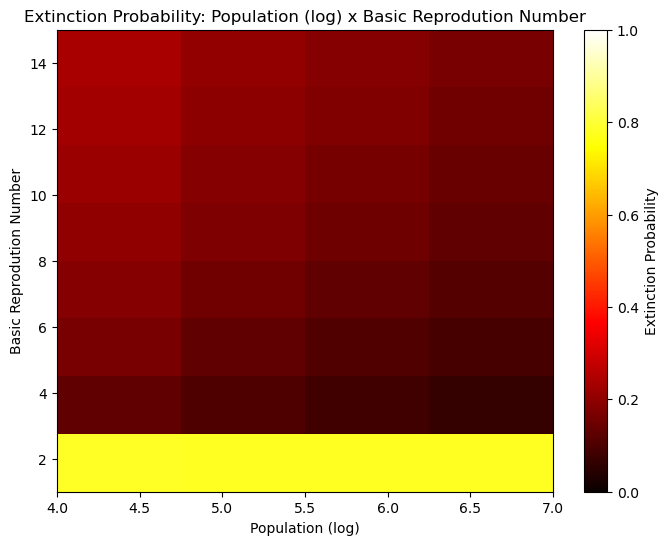

[[0.14559326 0.12829507 0.11638024 0.10627655]
 [0.25382397 0.22386716 0.202003   0.18394944]
 [0.31419536 0.28732664 0.26417249 0.24238736]
 [0.35897307 0.32685835 0.3050073  0.28684726]]


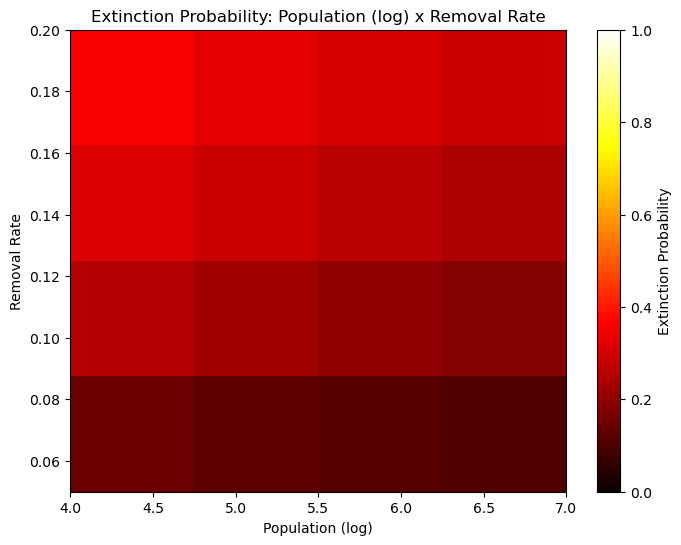

[[0.71742452 0.64565314 0.58603903 0.53071632]
 [0.18968768 0.15834807 0.13942029 0.12664287]
 [0.09040921 0.08764696 0.08748961 0.0874888 ]
 [0.07506426 0.07469904 0.07461409 0.07461262]]


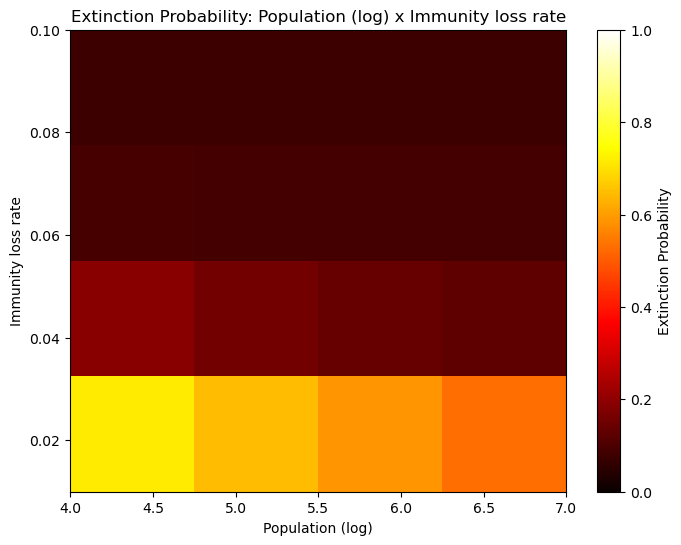

[[0.09092043 0.0740591  0.06879335 0.06879058]
 [0.16509038 0.13563432 0.11922038 0.10444145]
 [0.21547041 0.18894963 0.1688178  0.15231042]
 [0.2528452  0.22394912 0.20454239 0.1878528 ]
 [0.29007646 0.25864658 0.23401274 0.21535397]
 [0.31881289 0.28966501 0.26495636 0.24292011]
 [0.34031618 0.31619323 0.28865742 0.26974162]
 [0.3589462  0.33536478 0.31396565 0.29039437]
 [0.3808396  0.35181946 0.33405072 0.31198103]]


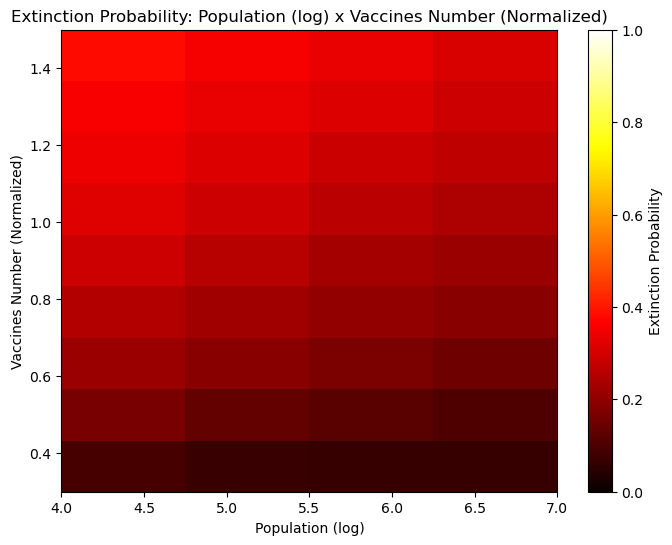

[[0.25018957 0.22178644 0.19960743 0.18247776]
 [0.26915933 0.24111226 0.22095439 0.20210276]
 [0.2721675  0.24523587 0.22517846 0.20879079]
 [0.2720911  0.2466345  0.22714755 0.21035678]
 [0.27087088 0.24594147 0.22745497 0.2104718 ]
 [0.27104292 0.24519264 0.22644354 0.2103319 ]
 [0.27150361 0.24520444 0.22644896 0.20952427]]


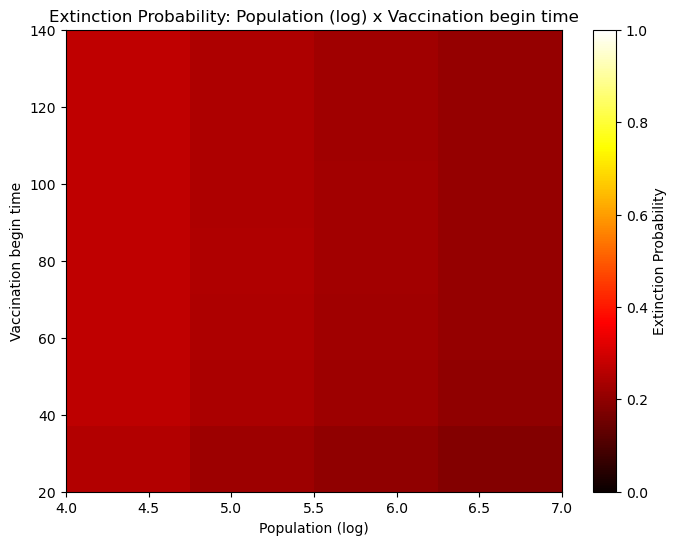

[[0.20891097 0.18521733 0.16358002 0.14442166]
 [0.25920471 0.24158603 0.22835012 0.21597519]
 [0.29617471 0.26507438 0.24405326 0.22600446]
 [0.30829528 0.27446947 0.25157964 0.23305929]]


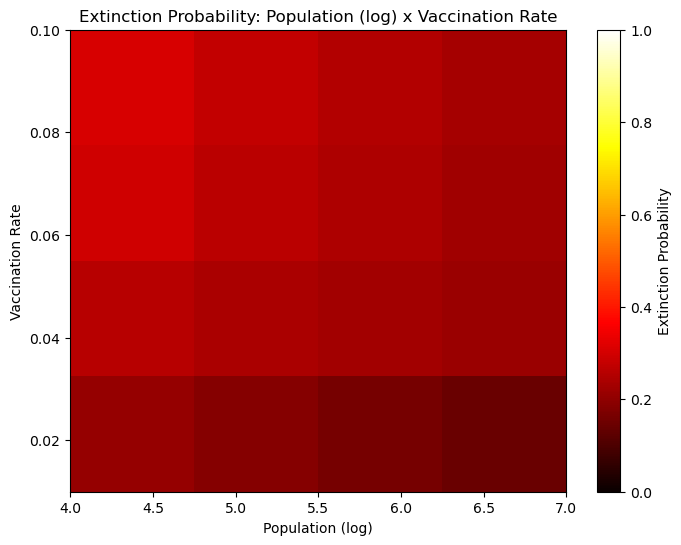

[[0.59865072 0.00597194 0.02329546 0.04535286 0.06193085 0.07658717
  0.0862589  0.09504234]
 [0.76875714 0.07602063 0.10793197 0.12982676 0.14473736 0.15658705
  0.16664125 0.17678497]
 [0.85291329 0.13115596 0.16271153 0.18404418 0.20104624 0.21566146
  0.22848085 0.24015018]
 [0.90071831 0.16967267 0.20195238 0.22466214 0.24416654 0.2615563
  0.27114521 0.28149841]]


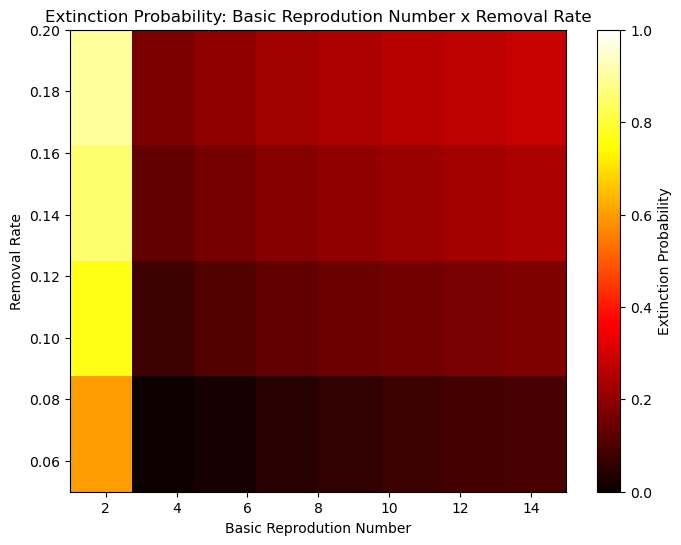

[[9.86041968e-01 3.79248103e-01 4.79175880e-01 5.48513835e-01
  5.95951551e-01 6.32613804e-01 6.57164728e-01 6.80956164e-01]
 [8.36290797e-01 3.57310969e-03 1.67154685e-02 3.53721095e-02
  5.59294425e-02 7.68608316e-02 9.36750462e-02 1.09781024e-01]
 [7.00726679e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.17338168e-04 1.68643164e-03 2.73870413e-03]
 [5.97980014e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


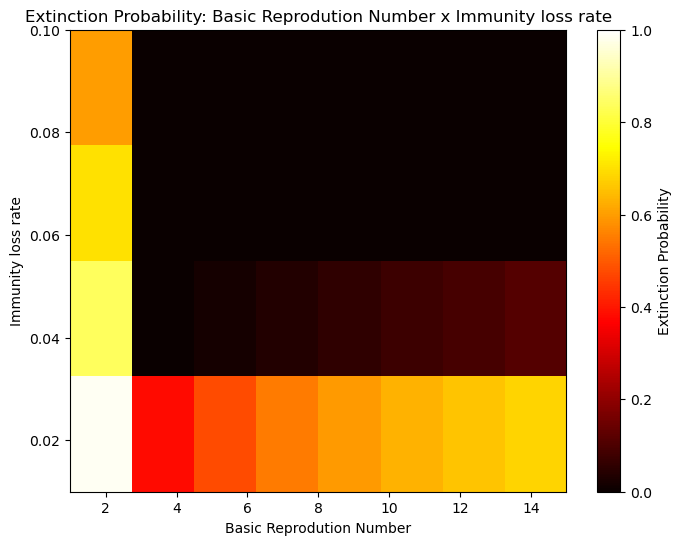

[[0.55222312 0.00170741 0.00120602 0.00183077 0.00415145 0.00949817
  0.01278461 0.02172537]
 [0.653358   0.01218066 0.02137597 0.03839423 0.05739407 0.07621593
  0.08933197 0.10052225]
 [0.72357138 0.03820715 0.06917727 0.09658351 0.11545564 0.12755841
  0.13599621 0.14454695]
 [0.77511437 0.07523413 0.11273786 0.13275562 0.14798532 0.15728454
  0.16458611 0.17268106]
 [0.81411435 0.10782092 0.14048432 0.16165727 0.17268016 0.18678719
  0.19997704 0.21265823]
 [0.84438249 0.12866747 0.1636554  0.18479467 0.202527   0.22190679
  0.23648478 0.25029015]
 [0.86838824 0.14557123 0.18352605 0.20921336 0.2343695  0.25188097
  0.26334225 0.27352532]
 [0.88770826 0.16507363 0.20165502 0.23384714 0.25628508 0.27262954
  0.2852405  0.29490283]
 [0.90347858 0.18688512 0.22193763 0.2546668  0.27588402 0.29462041
  0.3054405  0.31446859]]


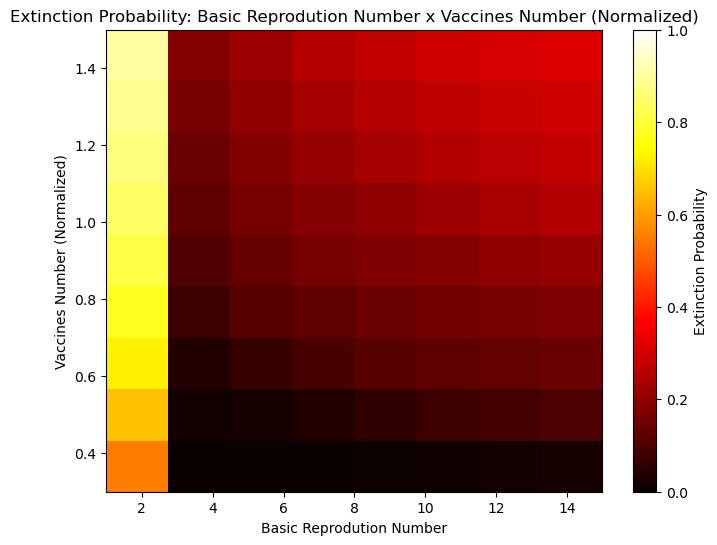

[[0.78023952 0.05378726 0.09282176 0.12556888 0.14461317 0.15998884
  0.17047248 0.18063052]
 [0.7802596  0.08641896 0.13022592 0.14728077 0.16111976 0.1761547
  0.18684486 0.19835291]
 [0.78027889 0.11008338 0.12930553 0.14593519 0.1643842  0.18041168
  0.19123961 0.20110677]
 [0.78023415 0.11273516 0.12548404 0.15013891 0.1680634  0.18161505
  0.19206464 0.2021245 ]
 [0.78025183 0.10580841 0.12827662 0.15139243 0.16769109 0.1817475
  0.1921398  0.20217055]
 [0.7802692  0.10010398 0.13124765 0.15095141 0.16755374 0.18168441
  0.19210056 0.20211106]
 [0.78028587 0.10099997 0.13044835 0.1505328  0.16736638 0.18158378
  0.19205891 0.2020865 ]]


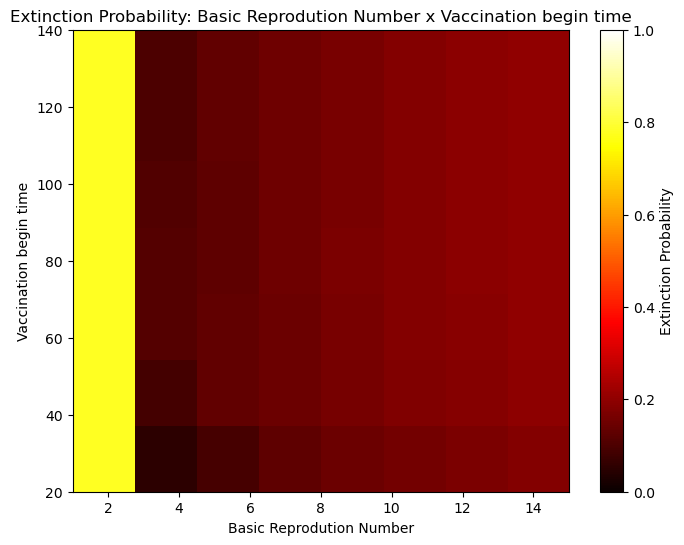

[[0.78028431 0.07681935 0.08226047 0.08589902 0.08967966 0.09345281
  0.09676173 0.09910259]
 [0.78023597 0.09983883 0.1322571  0.15306205 0.16748634 0.17837045
  0.18601194 0.19296943]
 [0.78031388 0.10243392 0.13883901 0.16858924 0.19147253 0.21253626
  0.22704587 0.24138292]
 [0.78020529 0.10372911 0.14253476 0.17633562 0.20324247 0.22603246
  0.24270667 0.26002096]]


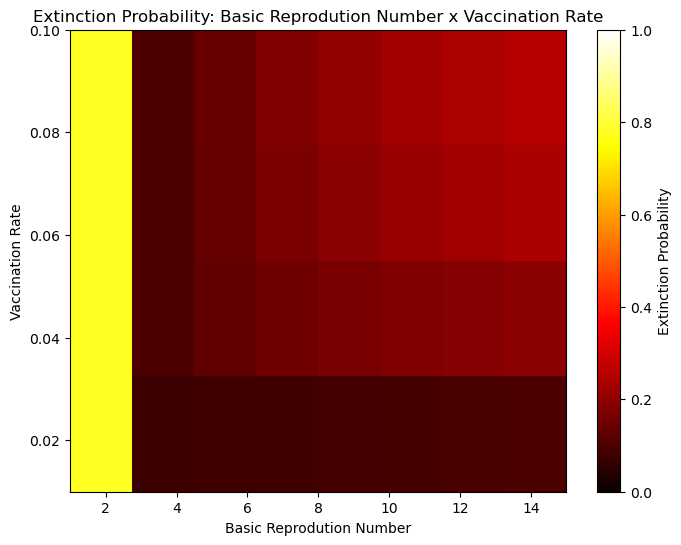

[[0.31633729 0.59240443 0.74402297 0.82706832]
 [0.07953616 0.11578353 0.1770627  0.24171653]
 [0.05679804 0.08502742 0.10000636 0.11120276]
 [0.04387363 0.07042819 0.08698982 0.09769838]]


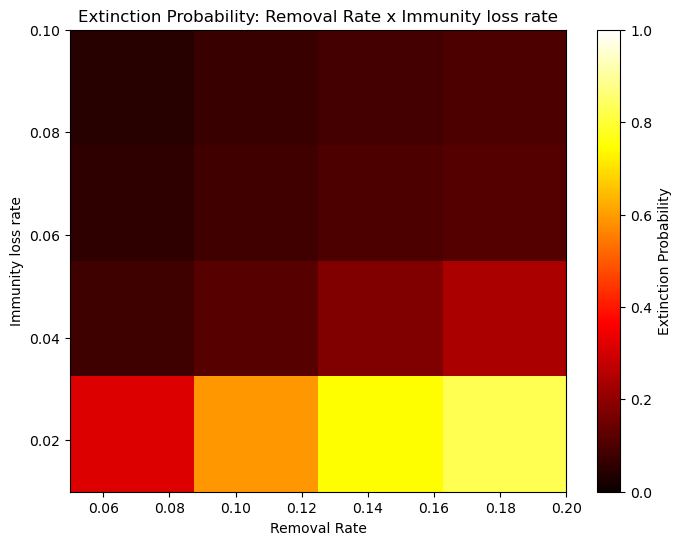

[[0.04451212 0.06540487 0.07994386 0.11270261]
 [0.0563542  0.08869138 0.15895306 0.22038789]
 [0.06522473 0.15235658 0.23238167 0.27558528]
 [0.08345492 0.20702008 0.2716397  0.30707481]
 [0.11711708 0.24290475 0.29749928 0.34056864]
 [0.15416157 0.26645446 0.32469691 0.37104143]
 [0.18095764 0.2846086  0.35262331 0.3967189 ]
 [0.19926298 0.30575214 0.37730625 0.41634963]
 [0.21618126 0.33000517 0.39814012 0.43436426]]


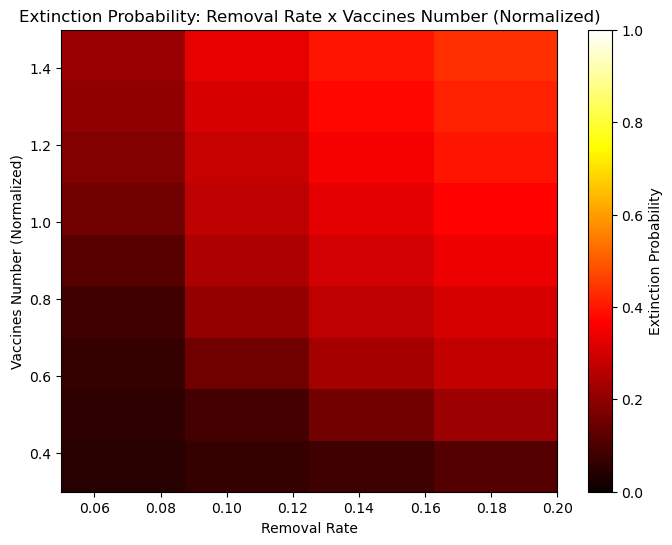

[[0.08890161 0.18388673 0.26286328 0.31840958]
 [0.11072477 0.2163072  0.28157205 0.32472472]
 [0.12671559 0.22173844 0.28182613 0.32109247]
 [0.1336613  0.22268967 0.28050672 0.31937223]
 [0.13591332 0.22299877 0.27837085 0.31745618]
 [0.13655005 0.22237653 0.27734729 0.31673715]
 [0.13648731 0.22137891 0.27665692 0.31815814]]


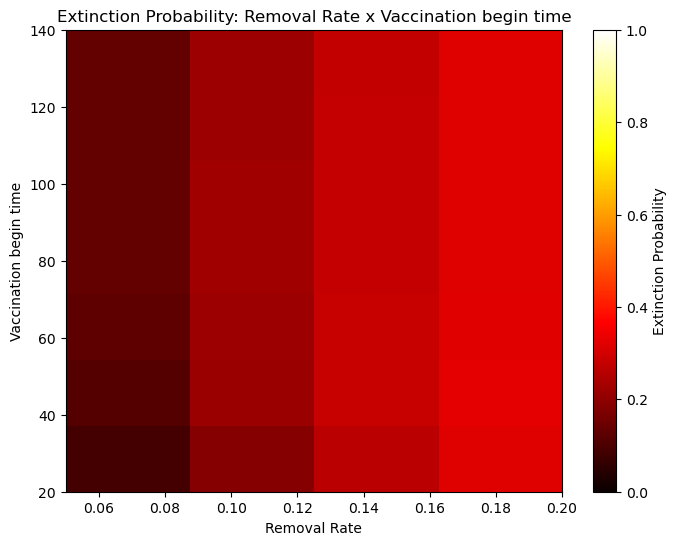

[[0.07591268 0.15199989 0.21874107 0.25547633]
 [0.13840152 0.23262605 0.27477285 0.29931565]
 [0.14103109 0.23689016 0.30068657 0.352699  ]
 [0.14119983 0.24212747 0.31388136 0.37019501]]


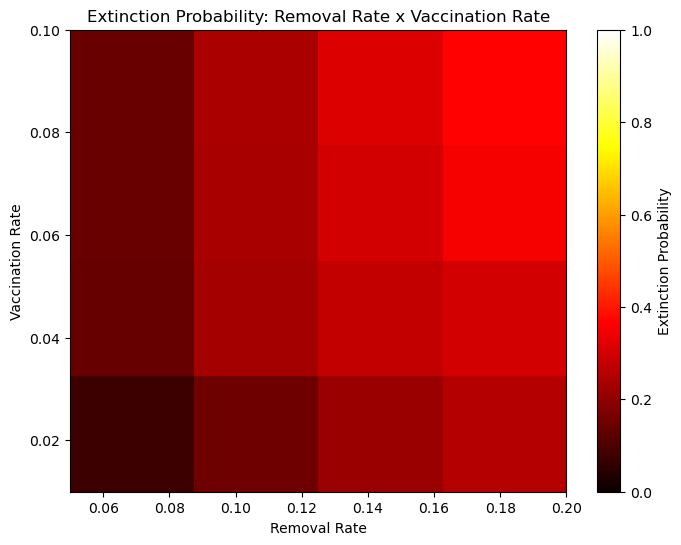

[[0.14249408 0.07184197 0.05002002 0.03820739]
 [0.31901754 0.08808059 0.06554513 0.05174327]
 [0.48711761 0.09846556 0.07722462 0.06274048]
 [0.60364554 0.10762304 0.08615717 0.07176375]
 [0.69890559 0.12693867 0.09305402 0.07919147]
 [0.7716175  0.16094088 0.09845077 0.08534522]
 [0.81998197 0.20170655 0.10273424 0.09048569]
 [0.85365478 0.24258445 0.10763139 0.09480038]
 [0.88318969 0.28354085 0.11351042 0.09844987]]


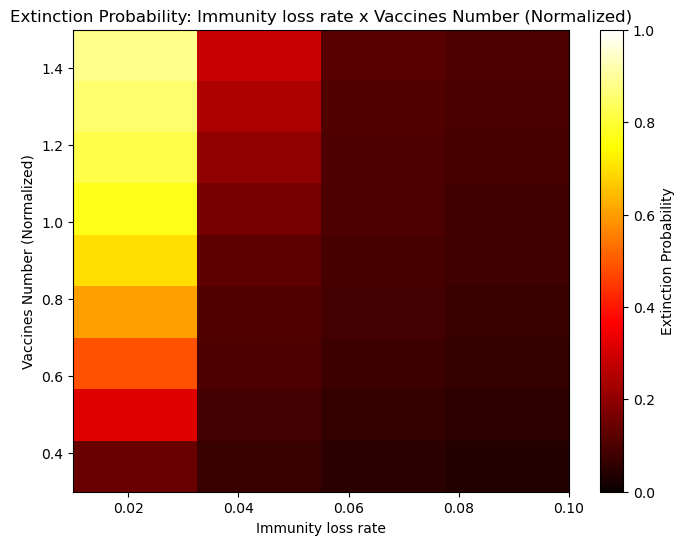

[[0.53876796 0.15229301 0.08825778 0.07474247]
 [0.61630095 0.1540251  0.08825687 0.07474582]
 [0.63474205 0.1536207  0.08826039 0.07474949]
 [0.63955992 0.15367313 0.08825367 0.07474321]
 [0.63804267 0.15369245 0.08825714 0.07474686]
 [0.63631911 0.15368079 0.0882606  0.07475051]
 [0.63597513 0.15368793 0.08826406 0.07475416]]


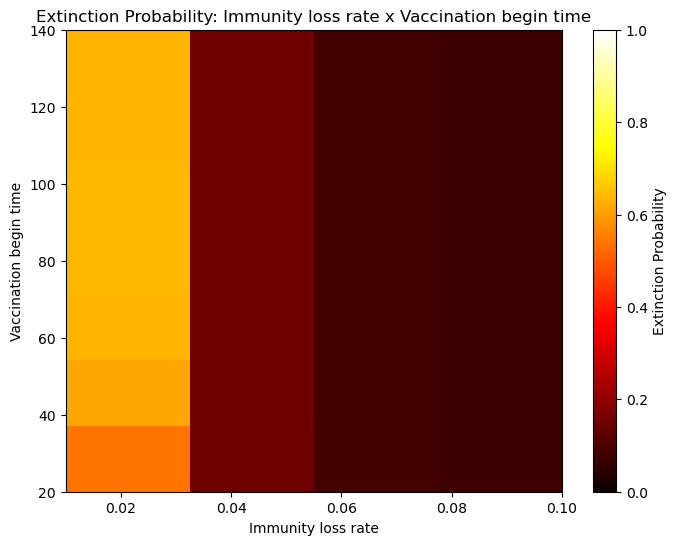

[[0.43524328 0.10453968 0.08759496 0.07475205]
 [0.67713407 0.10565215 0.08758673 0.07474311]
 [0.68324054 0.18571168 0.08759914 0.07475546]
 [0.68421512 0.21819541 0.09025375 0.07473939]]


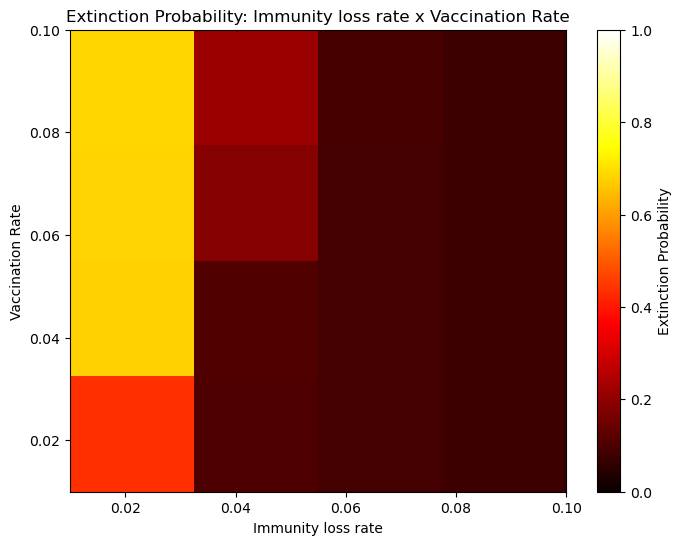

[[0.07900311 0.1276103  0.16501879 0.19468176 0.22077125 0.2450891
  0.26835935 0.29672221 0.32438185]
 [0.07731985 0.14334603 0.1905894  0.21826911 0.24472526 0.2717687
  0.29741761 0.31738845 0.33916525]
 [0.07447584 0.13139158 0.19141689 0.22563387 0.25517162 0.28329567
  0.30763732 0.32660175 0.34496388]
 [0.07495155 0.12885642 0.18320391 0.22540911 0.25929519 0.2887035
  0.31155471 0.33062852 0.34891442]
 [0.07450554 0.12877909 0.17957347 0.22090909 0.2574044  0.28865944
  0.31391364 0.33313536 0.35128297]
 [0.0746093  0.12878283 0.17959367 0.21769714 0.25537068 0.28858972
  0.31349679 0.3342545  0.35188015]
 [0.07462086 0.12891018 0.18031334 0.21848154 0.25391867 0.28751402
  0.31371039 0.33394347 0.35212041]]


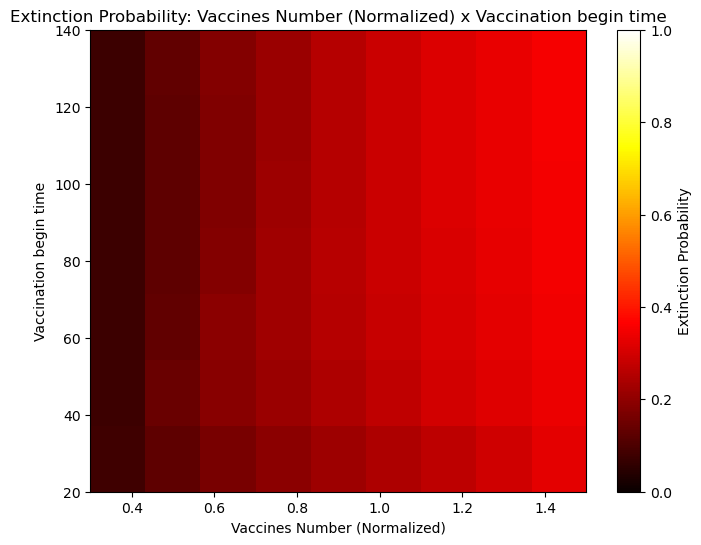

[[0.0691821  0.08749744 0.11600106 0.14930009 0.18594973 0.21627103
  0.2373417  0.25225639 0.2659929 ]
 [0.07666657 0.14229258 0.20092062 0.23792054 0.26373194 0.28384136
  0.29751402 0.30636345 0.31726005]
 [0.07825335 0.14663387 0.20381795 0.239796   0.27066938 0.30198606
  0.33229449 0.35978823 0.38720102]
 [0.07846144 0.14796266 0.20480864 0.24217288 0.2777387  0.31425592
  0.34775824 0.38026294 0.40823684]]


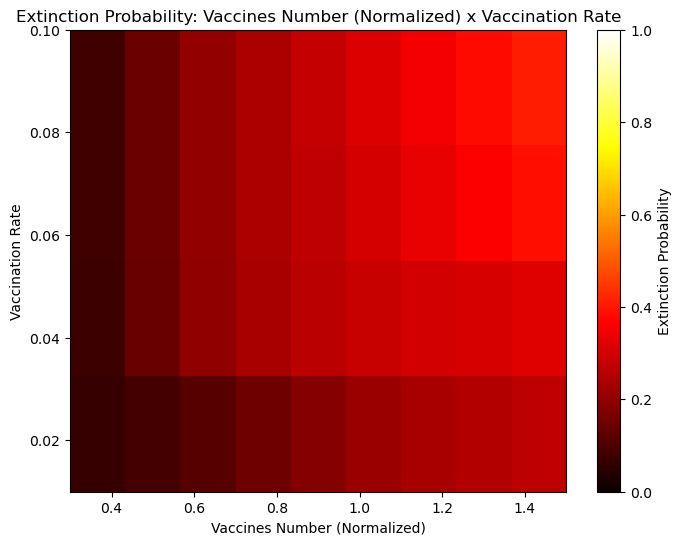

[[0.18244983 0.18054514 0.17555745 0.17404014 0.17220789 0.1716887
  0.17223829]
 [0.21057002 0.2343694  0.2409601  0.2424503  0.24227252 0.24182931
  0.24150145]
 [0.22742596 0.25487346 0.26284764 0.26504144 0.26520821 0.26483376
  0.26455646]
 [0.23361539 0.26354075 0.27200743 0.27469805 0.27505049 0.27465924
  0.27438508]]


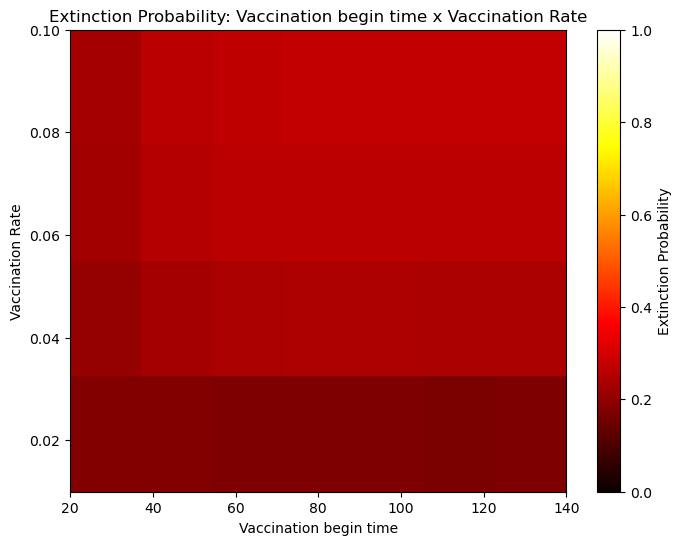

In [15]:
column_names = ['Population (log)', 'Basic Reprodution Number', 'Removal Rate', 'Immunity loss rate' ,
                'Vaccines Number (Normalized)', 'Vaccination begin time', 'Vaccination Rate']
for u in range(len(column_names)):
    for v in range(u+1, len(column_names)):
        m = column_names[u]
        n = column_names[v]
        x = minimo_infectados[m].values
        y = minimo_infectados[n].values
        z = minimo_infectados['Extinction Probability'].values
        x_unique = np.sort(minimo_infectados[m].unique())
        y_unique = np.sort(minimo_infectados[n].unique())
        # Criando uma matriz de zeros com dimensões baseadas em x e y
        Z = np.zeros((len(y_unique), len(x_unique)))
        # Preencher a matriz Z com os valores correspondentes
        for i, xi in enumerate(x_unique):
            for j, yj in enumerate(y_unique):
                mask = (minimo_infectados[m] == xi) & (minimo_infectados[n] == yj)
                if mask.any():
                    Z[j, i] = minimo_infectados.loc[mask, 'Extinction Probability'].values.mean()
        print(Z)
            # Criar o gráfico de mapa de calor
        plt.figure(figsize=(8, 6))
        plt.imshow(Z, aspect='auto', origin='lower', cmap='hot', extent=[x.min(), x.max(), y.min(), y.max()], vmin=0, vmax=1)
        plt.colorbar(label="Extinction Probability")
        plt.xlabel(m)
        plt.ylabel(n)
        plt.title(f"Extinction Probability: {m} x {n}")
        plt.show()